<a href="https://colab.research.google.com/github/pn0159/prathima_INFO5731_Fall2020/blob/master/Prathima_Nuthalapati_INFO5731_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
#Question 1


**Topic Modelling:**

As the name suggests,Topic Modeling is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. 
Topic Models are very useful for multiple purposes, including like:
a)Document clustering b)Organizing large blocks of textual data c)Information retrieval from unstructured text d)Feature selection and many more

**Steps for Model Implementation:**

1) Importing necessary libraries and loading data(here,JSON file)

2) Data Preprocessing

3) Model Implementation(using SLDA,LLDA)- Finding top 20 topics 
4) Visualizing topics using pyLDAVis

**Step-1: Importing necessary libraries and Loading the given data**


I am using Tomotopy, which is a Python extension of tomoto (Topic Modeling Tool) which is a Gibbs-sampling based topic model library. It utilizes a vectorization of modern CPUs for maximizing speed. 
The Tomoto supports several major topic models including SLDA and LLDA.Tomotopy uses Collapsed Gibbs-Sampling(CGS) to infer the distribution of topics and the distribution of words.
Generally CGS converges more slowly than Variational Bayes(VB) that gensim's LDAModel uses, but its iteration can be computed much faster.

In [48]:
!pip install tomotopy

     |████████████████████████████████| 13.5MB 288kB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=5c0f4e53f79795ea9cb209f0e1188f3ba68db23e7b733e23bc7d2b51483f87c5
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo



pyLDAvis is a interactive LDA visualization python package.It is the most commonly used and a best way to visualise the information contained in a topic model.

In [49]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=a520fd30fdc58a2cc47b122108da6660fd2c9ef2196e5ab2ed2b212253276657
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [51]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
import os
import logging
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tomotopy as tp
import numpy as np
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
#Loading the given data

with zipfile.ZipFile('/content/sample_data/Assignment four data Yelp (question 1 and 2).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataAssignment4')

In [53]:
# Here i am using only review text from yelp review data

reviews=[]
for files in glob.iglob('/content/dataAssignment4/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for i in data:
    reviews.append(i['text'])
print("The total reviews are:",len(reviews))

The total reviews are: 500000


In [54]:
df = pd.DataFrame(reviews,columns=['review'])
df.head(10)

,review
0,"Awesome service and fantastic food, the wait s..."
1,Seemed pretty pricey to me for what you got......
2,We TRIED to go to the buffet on Tuesday eve fo...
3,Came here for lunch on my 20th birthday and th...
4,"Amazing treats - I love their cinnamon roll, c..."
5,Me and my family went to TasteBuds tonight..I ...
6,Stay away from this train wreck of a hospital ...
7,I have now had two amazing meals here and can'...
8,My classmates and I go here because we go to c...
9,Really good service. They helped us pick out f...


*Step 2: Data Preprocessing*

In [55]:
# Data cleaning

#lower
df['review']=df['review'].map(lambda x: x.lower())
#removing punctutations
df['review']=df['review'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#Lemmitizing
df['review']=df['review'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df['review']=df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head(10)

,review
0,"awesome service fantastic food, wait staff fri..."
1,seemed pretty pricey got.....burgers tasted pr...
2,"tried go buffet tuesday eve dinner, found clos..."
3,came lunch 20th birthday gave u free dessert s...
4,"amazing treat - love cinnamon roll, cupcakes, ..."
5,family went tastebud tonight..i love place beg...
6,"stay away train wreck hospital , er unprofessi..."
7,"two amazing meal cant wait return. steaks, lob..."
8,classmate go go cpcc walking distance class al...
9,really good service. helped u pick frame whole...


*Step 3: Modelling using SLDA and LLDA*

In [56]:
#Topic Modelling using Supervised LDA algorithm
# I am going to identify the top 20 topics (with 15 words for each topic) in the given dataset


modelSLDA = tp.SLDAModel(k=20) 
for i in df['review']:
    modelSLDA.add_doc(i.split())
for i in range(0, 100, 10):
    modelSLDA.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, modelSLDA.ll_per_word))
for k in range(modelSLDA.k):
    print('Top 15 words of topic #{}'.format(k))
    print(modelSLDA.get_topic_words(k, top_n=15))

modelSLDA.summary()

Iteration: 0	Log-likelihood: -10.304269823279059
Iteration: 10	Log-likelihood: -9.776890489718628
Iteration: 20	Log-likelihood: -9.527139417213366
Iteration: 30	Log-likelihood: -9.39508658072888
Iteration: 40	Log-likelihood: -9.319178626828261
Iteration: 50	Log-likelihood: -9.27195198058373
Iteration: 60	Log-likelihood: -9.239885975796275
Iteration: 70	Log-likelihood: -9.217770655348241
Iteration: 80	Log-likelihood: -9.201011511882978
Iteration: 90	Log-likelihood: -9.187824446100699
Top 15 words of topic #0
[('room', 0.010674909688532352), ('one', 0.006962986197322607), ('would', 0.006510757375508547), ('get', 0.0055986191146075726), ('front', 0.005525648128241301), ('hour', 0.004724886734038591), ('u', 0.0047143250703811646), ('-', 0.004682640079408884), ('could', 0.00461927056312561), ('door', 0.004325465764850378), ('time', 0.004305302631109953), ('hotel', 0.004222730174660683), ('even', 0.004222730174660683), ('never', 0.004125755745917559), ('day', 0.003854994662106037)]
Top 15 wo

**Topic 0:** This is related to **Hotel room view experience**

**Topic 1**: This is related to  **Food Combo Order**

**Topic 2**: This is related to **Eastern Cuisine**

**Topic 3**: This is related to **Vacation**

**Topic 4**: This is related to **Friendly staff at hotel**

**Topic 5**: This is related to **Bad Experience on Food delievery**

**Topic 6**: This is related to **Combo**

**Topic 7**: This is related to **Customer Service**

**Topic 8** : This is related to  **Food Choice at Restaurant**

**Topic 9**: This is related to **Enjoyment**

**Topic 10**: This is related to **Desserts**

**Topic 11**: This is related to **Doctor appointment**

**Topic 12**: This is related to **Restaurant Food**

**Topic 13**: This is related to **Bar**

**Topic 14**: This is related to **Trip**

**Topic 15**: This is related to **Store**

**Topic 16**: This is related to  **Salon** 

**Topic 17**: This is related to **Car Service**

**Topic 18**: This is related to **Mexican/Spanish Language**

**Topic 19**: This is related to **Bad Experience**



In [70]:

topic_term_dists = np.stack([modelSLDA.get_topic_word_dist(k) for k in range(modelSLDA.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in modelSLDA.docs])
doc_lengths = np.array([len(doc.words) for doc in modelSLDA.docs])
vocab = list(modelSLDA.used_vocabs)
term_frequency = modelSLDA.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

In [71]:
pyLDAvis.display(prepared_data)

LDA

In [87]:
reviews1 = reviews[:10000]

In [ ]:
reviews1 = [re.sub('\S*@\S*\s?', '', sent) for sent in reviews1]
reviews1 = [re.sub('\s+', ' ', sent) for sent in reviews1]
reviews1 = [re.sub("\'", "", sent) for sent in reviews1]

In [89]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reviews1))

In [90]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [91]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [95]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.037*"fix" + 0.034*"later" + 0.032*"company" + 0.027*"horrible" + 0.022*"son" + 0.019*"sad" + 0.018*"awful" + 0.017*"fit" + 0.015*"third" + 0.014*"treatment"'), (1, '0.045*"fry" + 0.044*"side" + 0.044*"dish" + 0.044*"meal" + 0.043*"sauce" + 0.040*"dinner" + 0.038*"meat" + 0.028*"plate" + 0.025*"disappoint" + 0.024*"portion"'), (2, '0.109*"room" + 0.056*"stay" + 0.047*"hotel" + 0.027*"pool" + 0.025*"cost" + 0.025*"comfortable" + 0.019*"brunch" + 0.017*"view" + 0.016*"night" + 0.015*"forget"'), (3, '0.034*"good" + 0.031*"place" + 0.028*"food" + 0.022*"great" + 0.021*"come" + 0.018*"time" + 0.018*"go" + 0.017*"service" + 0.016*"make" + 0.016*"get"'), (4, '0.045*"would" + 0.041*"say" + 0.038*"go" + 0.032*"could" + 0.030*"take" + 0.029*"get" + 0.028*"give" + 0.027*"ask" + 0.024*"know" + 0.024*"want"'), (5, '0.072*"location" + 0.062*"car" + 0.034*"drive" + 0.024*"parking" + 0.021*"several" + 0.020*"deliver" + 0.019*"nail" + 0.019*"delivery" + 0.017*"tv" + 0.017*"complaint"'), (6, '0.0

**Topic 0:** This is related to **Bad Experience**

**Topic 1**: This is related to **Restaurant**

**Topic 2**: This is related to **Vacation**

**Topic 3**: This is related to **Restaurant Service**

**Topic 4:** This is related to **choice**

**Topic 5:** This is related to **Car delievery**

**Topic 6:** This is related to **Party**

**Topic 7**: This is related to **Cusine**

**Topic 8** : This is related to **Outdoor Enjoyment**

**Topic 9:** This is related to **Eatery**

**Topic 10:** This is related to **Offer/food**

**Topic 11:** This is related to **Good Experience**

**Topic 12:** This is related to **Describing qualities of Person**

**Topic 13:** This is related to **Convienience**

**Topic 14:** This is related to **Food**

**Topic 15:** This is related to **Discount Offer at Salon**

**Topic 16:** This is related to **Job**

**Topic 17:** This is related to **Wine**

**Topic 18:** This is related to **Product Issue**

**Topic 19:** This is related to **Chinese Cusine**

In [98]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.381697  0.127176       1        1  39.965731
4      0.347190  0.062684       2        1  13.466631
11     0.096568 -0.327248       3        1   5.300422
14     0.022753 -0.250438       4        1   4.120402
1      0.000296 -0.094376       5        1   3.999293
16     0.032191  0.032439       6        1   3.969112
10    -0.029688 -0.003645       7        1   3.864844
18     0.022369 -0.009369       8        1   3.527868
6     -0.040465  0.015511       9        1   2.922193
5     -0.063184  0.032711      10        1   2.242680
2     -0.030986  0.064313      11        1   2.175486
8     -0.056387  0.028582      12        1   2.012649
9     -0.075773  0.034238      13        1   1.878887
7     -0.081223  0.030338      14        1   1.709541
17    -0.083219  0.037454      15        1   1.699665
12    -0.085297  0.040800      16        1   1.673494
0     -0.083281  0.048778      17        1   1.593996
19    -0.085416  0.036373      18        1   1.380781
15    -0.090401  0.048864      19        1   1.316882
13    -0.097743  0.044814      20        1   1.179444, topic_info=          Term         Freq        Total Category  logprob  loglift
90       order  3447.000000  3447.000000  Default  30.0000  30.0000
47       would  3684.000000  3684.000000  Default  29.0000  29.0000
19          go  5394.000000  5394.000000  Default  28.0000  28.0000
6         good  5887.000000  5887.000000  Default  27.0000  27.0000
21       place  5426.000000  5426.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
467       pile    34.275464    35.167255  Topic20  -5.0080   4.4144
2062   martini    33.321784    34.213574  Topic20  -5.0362   4.4137
464     freeze    33.154303    34.046093  Topic20  -5.0412   4.4136
5014       rat    30.556753    31.448544  Topic20  -5.1228   4.4114
2974  espresso    30.300237    31.192028  Topic20  -5.1313   4.4111

[691 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
663      13  0.990969    absolute
582      12  0.989845      actual
2646     17  0.987757  additional
716      14  0.983861   advertise
1547     19  0.988766      advise
...     ...       ...         ...
2897      8  0.992366       write
873       2  0.996817       wrong
244       6  0.998824        year
1829     13  0.990092        yelp
1347     16  0.989922       yummy

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 12, 15, 2, 17, 11, 19, 7, 6, 3, 9, 10, 8, 18, 13, 1, 20, 16, 14])

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Question 2

Sentiment analysis, which is also called opinion mining, review mining (appraisal extraction), or attitude analysis, is the task of detecting, extracting, and classifying opinions, sentiments, and attitudes concerning different topics. In a machine-learning approach, sentiment analysis can be considered as a supervised classification task.We have different feature selection techniques such as Mutual Information,Information Gain,Chi-square,Tf-idf,lexicon, word vectors and many more.

Mutual Information: MIterm selects features that are not uniformly distributed among the sentiment classes because they are informative of their classes.

Chi-square:Chi-square measures how much expected counts and observed counts deviate from each other.

Information Gain: Information gainis the most commonly used feature selection method in the field of machine learning. It
calculates the relevance of a feature for prediction of sentiment of review by analysing the presence or absence of a
feature in a document.

TF-Idf: It is a weighting scheme, which measures how relevant a word to a sample in the dataset.The relevance
increases when the number of times a word appears in the sample

Other feature extraction technique is word embeddings (also known as word vectors). 

Here for this analysis, i have used TF-Idf, which is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.Machine learning with natural language is faced with one major hurdle – its algorithms usually deal with numbers, and natural language is, well, text. So we need to transform that text into numbers(text vectorization). It’s a fundamental step in the process of machine learning for analyzing data, and different vectorization algorithms will drastically affect end results, so we need to choose one that will deliver the results we are hoping for.

Once we have transformed words into numbers, in a way that’s machine learning algorithms can understand, the TF-IDF score can be fed to algorithms such as Naive Bayes and Support Vector Machines etc., greatly improving the results of more basic methods like word counts.

So this kind of representations makes it possible for words with similar meaning to have a similar representation, which can improve the performance of classifiers.

In [35]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd
import json
import zipfile
import glob
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from textblob import TextBlob
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:

with zipfile.ZipFile('/content/sample_data/Assignment four data Yelp (question 1 and 2).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataAssignment4_2')

In [37]:
rate = [ ]
text = [ ]
for files in glob.iglob('/content/dataAssignment4_2/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for i in data:
      rate.append(i['stars'])
      text.append(i['text'])

In [38]:
mydata = pd.DataFrame({'Reviews':text,'Star Ratings':rate})

In [39]:
mydata['Star Ratings']=mydata['Star Ratings'].astype(int)
mydata.head()

,Reviews,Star Ratings
0,"Awesome service and fantastic food, the wait s...",5
1,Seemed pretty pricey to me for what you got......,2
2,We TRIED to go to the buffet on Tuesday eve fo...,1
3,Came here for lunch on my 20th birthday and th...,5
4,"Amazing treats - I love their cinnamon roll, c...",5


In [40]:
#Data Preprocessing

mydata['clean text'] = mydata['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mydata['clean text'] = mydata['clean text'].str.replace('[^\w\s]','')
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
high_freq = pd.Series(' '.join(mydata['clean text']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))
low_freq = pd.Series(' '.join(mydata['clean text']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

mydata['clean text'] = mydata['Reviews'].str.replace('[^\w\s]','')
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
mydata['clean text'] = mydata['clean text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [41]:
def sentiment(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
mydata['sentiment'] = mydata['Star Ratings'].apply(lambda x: sentiment(x))
train, test = sklearn.model_selection.train_test_split(mydata, train_size=0.8, test_size=0.2)

I am using models Linear Support Vector Classifier(LINEAR SVC) . Naive Bayes and Gradient Boosting for my analysis

LINEAR SVC

In [42]:
svc_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
svc = svc_pipeline.fit(train['clean text'], train['sentiment'])
test['predicted sentiment'] = svc.predict(test['clean text'])

In [43]:
print('TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentiment', 'predicted sentiment']].head(10))
svc_recall = recall_score(test['sentiment'], test['predicted sentiment'], average='macro')
svc_precision = precision_score(test['sentiment'], test['predicted sentiment'], average='macro')
svc_accuracy = accuracy_score(test['sentiment'], test['predicted sentiment'])*100
svc_f1 = f1_score(test['sentiment'], test['predicted sentiment'], average='macro')
print('Accuracy of LinearSVC :', svc_accuracy)
print('f1-score of LinearSVC :', svc_f1)
print('Precision score of LinearSVC :', svc_precision)
print('Recall score of LinearSVC :', svc_recall)

TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS: 

                                                  Reviews  ... predicted sentiment
487691  This location Just opened  3weeks ago-so its c...  ...       Very positive
284111  Nice place to hang out after walking a lot alo...  ...            Positive
397911  I came here for dinner on Friday July 6th. I d...  ...       Very positive
469578  I went here with my wife about 4 months ago de...  ...             Neutral
373417  If you're looking fo a gift for an out of "Wis...  ...       Very positive
295158  This review is for 4.5 stars.\n\nI really have...  ...            Positive
114979  STAY AWAY FROM THIS SCAM!!!!!!!!!!!!!!!!!  I g...  ...       Very negative
454117  Don't go there! All the sauces taste the same ...  ...       Very negative
484339  Really great place to have light bread and che...  ...       Very positive
8101    The first time I visited Wicked was exactly on...  ...            Positive

[10 rows x 3 columns]
Accuracy of LinearSV

Naive Bayes

In [44]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['clean text'], train['sentiment'])
test['nb predicted sentiment'] = nb.predict(test['clean text'])

In [45]:
print('\n', 'MultinomialNB SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentiment', 'nb predicted sentiment']].head(10))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
nb_recall = recall_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_precision = precision_score(test['sentiment'], test['nb predicted sentiment'], average='macro')
nb_accuracy = accuracy_score(test['sentiment'], test['nb predicted sentiment'])*100
nb_f1 = f1_score(test['sentiment'], test['nb predicted sentiment'], average='macro')

print('Accuracy of MultinomialNB:', nb_accuracy)
print('f1-score of MultinomialNB:', nb_f1)
print('Precision score of MultinomialNB:', nb_precision)
print('Recall score of  MultinomialNB:', nb_recall)


 MultinomialNB SENTIMENT ANALYSIS: 

                                                  Reviews  ... nb predicted sentiment
487691  This location Just opened  3weeks ago-so its c...  ...          Very positive
284111  Nice place to hang out after walking a lot alo...  ...          Very positive
397911  I came here for dinner on Friday July 6th. I d...  ...          Very positive
469578  I went here with my wife about 4 months ago de...  ...               Positive
373417  If you're looking fo a gift for an out of "Wis...  ...          Very positive
295158  This review is for 4.5 stars.\n\nI really have...  ...          Very positive
114979  STAY AWAY FROM THIS SCAM!!!!!!!!!!!!!!!!!  I g...  ...          Very negative
454117  Don't go there! All the sauces taste the same ...  ...               Positive
484339  Really great place to have light bread and che...  ...          Very positive
8101    The first time I visited Wicked was exactly on...  ...          Very positive

[10 rows x 3 co

GRADIENT BOOSTING

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbpln = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=15,verbose=2))])
gb = gbpln.fit(train['clean text'], train['sentiment'])
test['GB predicted sentiment'] = gb.predict(test['clean text'])

      Iter       Train Loss   Remaining Time 
         1      556484.6191           16.25m
         2      547151.5685           15.05m
         3      539589.2390           14.15m
         4      533173.6185           12.93m
         5      527464.4366           11.73m
         6      522388.4110           10.55m
         7      517225.8017            9.38m
         8      512837.8318            8.19m
         9      508679.2485            7.01m
        10      505104.4855            5.85m
        11      501388.1112            4.70m
        12      498136.2799            3.53m
        13      495033.3808            2.35m
        14      492190.2146            1.18m
        15      489252.7527            0.00s


In [47]:
print('GRADIENTBOOSTING SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentiment', 'GB predicted sentiment']].head(10))

gb_recall = recall_score(test['sentiment'], test['GB predicted sentiment'], average='macro')
gb_precision = precision_score(test['sentiment'], test['GB predicted sentiment'], average='macro')
gb_accuracy = accuracy_score(test['sentiment'], test['GB predicted sentiment'])*100
gb_f1 = f1_score(test['sentiment'], test['GB predicted sentiment'], average='macro')

print('Accuracy of GradientBoosting:', gb_accuracy)
print('f1-score of GradientBoosting:', gb_f1)
print('Precision score of GradientBoosting:', gb_precision)
print('Recall score of GradientBoosting:', gb_recall)

GRADIENTBOOSTING SENTIMENT ANALYSIS: 

                                                  Reviews  ... GB predicted sentiment
487691  This location Just opened  3weeks ago-so its c...  ...          Very positive
284111  Nice place to hang out after walking a lot alo...  ...               Positive
397911  I came here for dinner on Friday July 6th. I d...  ...          Very positive
469578  I went here with my wife about 4 months ago de...  ...          Very positive
373417  If you're looking fo a gift for an out of "Wis...  ...          Very positive
295158  This review is for 4.5 stars.\n\nI really have...  ...               Positive
114979  STAY AWAY FROM THIS SCAM!!!!!!!!!!!!!!!!!  I g...  ...          Very negative
454117  Don't go there! All the sauces taste the same ...  ...          Very negative
484339  Really great place to have light bread and che...  ...          Very positive
8101    The first time I visited Wicked was exactly on...  ...          Very positive

[10 rows x 3 c

I have used Linear support vector classifier(LINEAR SVC) NaiveBayes(MultinominalNB) and Gradient Boosting supervised algorithms for my analysis.From the above results i could say for the given dataset,LINEAR SVC resulted in better accuracy than  Naive and gradient algorithm with accuracy 65%,53% and 51%(i have used just 15 iterations.i expect better result for more number of iterations) respectively,although both naives and gradient showed same amount of sensitivity.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
#Question 3

The objective of this is to 

1)Predict the sale price for each house.

2)Finding basic statistics like Mean, Standard Deviation,Min,Max ,Count etc., and Correlation, Skewness and RSquared to define if model fits


In [1]:
#Importing all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import matplotlib.pyplot as plt

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
#Loading the Train and Test data

train_data=pd.read_csv("/content/sample_data/train.csv")
test_data=pd.read_csv("/content/sample_data/test.csv")

#I am checking for number of features and datapoints i have in both the files.i.e., train and test data

print("The Number of data points in train data are:{0}\nThe Number of features in train data are:{1}".format(train_data.shape[0],train_data.shape[1]))
print("The Number of data points in test data are:{0}\nThe Number of features in test data are:{1}".format(test_data.shape[0],test_data.shape[1]))

The Number of data points in train data are:1460
The Number of features in train data are:81
The Number of data points in test data are:1459
The Number of features in test data are:80


In [3]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


From the above results,i can say there are 1460 datapoints in Train data, and 1459 datapoints in Test data. I could see NaN's in the data, which needs to be handled properly

In [5]:
print(train_data.isnull().sum())
train_data = train_data.replace(np.NaN,0)
print(train_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [6]:
print(test_data.isnull().sum())
test_data = test_data.replace(np.NaN,0)
print(test_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [11]:
column = list(train_data.select_dtypes(['object']).columns)

Performing the Basic Statistics

In [12]:
for i in train_data.columns:
    print("Statistics for feature : {0}".format(i))
    print(train_data[i].describe())
    print("...........................")

Statistics for feature : Id
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
...........................
Statistics for feature : MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
...........................
Statistics for feature : MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
...........................
Statistics for feature : LotFrontage
count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
...........................
Statistics for feature : LotArea
count      1460.000000
mean      1

In [13]:
for i in test_data.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(test_data[i].describe())
    print("...........................")

Basic statistics for feature : Id
count    1459.000000
mean     2190.000000
std       421.321334
min      1461.000000
25%      1825.500000
50%      2190.000000
75%      2554.500000
max      2919.000000
Name: Id, dtype: float64
...........................
Basic statistics for feature : MSSubClass
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
...........................
Basic statistics for feature : MSZoning
count     1459
unique       6
top         RL
freq      1114
Name: MSZoning, dtype: object
...........................
Basic statistics for feature : LotFrontage
count    1459.000000
mean       57.910212
std        32.266054
min         0.000000
25%        44.000000
50%        63.000000
75%        78.000000
max       200.000000
Name: LotFrontage, dtype: float64
...........................
Basic statistics for feature : LotArea
coun

In [14]:
#Statistics of output variable
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
train_data[column] = train_data[column].apply(lambda x: x.astype('category'))
train_data[column] = train_data[column].apply(lambda x: x.cat.codes)

In [16]:
test_data[column] = test_data[column].apply(lambda x: x.astype('category'))
test_data[column] = test_data[column].apply(lambda x: x.cat.codes)

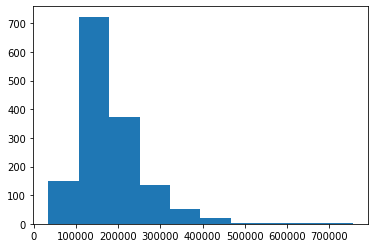

In [17]:
import matplotlib.pyplot as plt
plt.hist(train_data['SalePrice'])
plt.show()

In [18]:
print ("Skewness of SalePrice:", train_data['SalePrice'].skew())

Skewness of SalePrice: 1.8828757597682129


This looks skewed towards the right with Skew of 1.8828757597682129

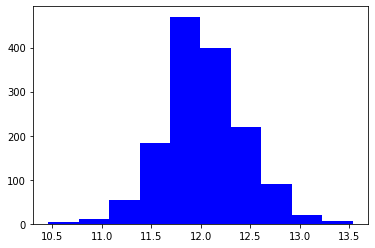

In [19]:
train_data['LT_SalePrice'] = np.log(train_data['SalePrice']+1)
plt.hist(train_data['LT_SalePrice'], color='blue')
plt.show()

In [20]:
print ("Skewness of Log Transformed SalePrice:", train_data['LT_SalePrice'].skew())

Skewness of Log Transformed SalePrice: 0.12134661989685329


This looks normal with Skew of 0.12134661989685329.
So The Log Transformation can be used to make highly skewed distributions less skewed.
The comparison of the means of log-transformed data is actually a comparison of geometric means

In [21]:
#  Finding Correlation 
correlate = train_data.corr(method='pearson')
print(correlate['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.166872
LotFrontage      0.209624
LotArea          0.263843
                   ...   
YrSold          -0.028923
SaleType        -0.054911
SaleCondition    0.213092
SalePrice        1.000000
LT_SalePrice     0.948374
Name: SalePrice, Length: 82, dtype: float64


In [22]:
train_data.select_dtypes(include=[np.number]).columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

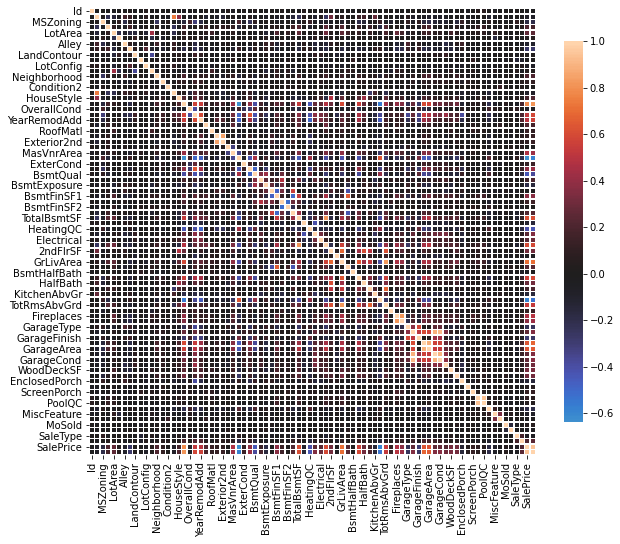

In [24]:
import seaborn as sns
def correlation_heatmap(train_data):
    correlations = train_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train_data)

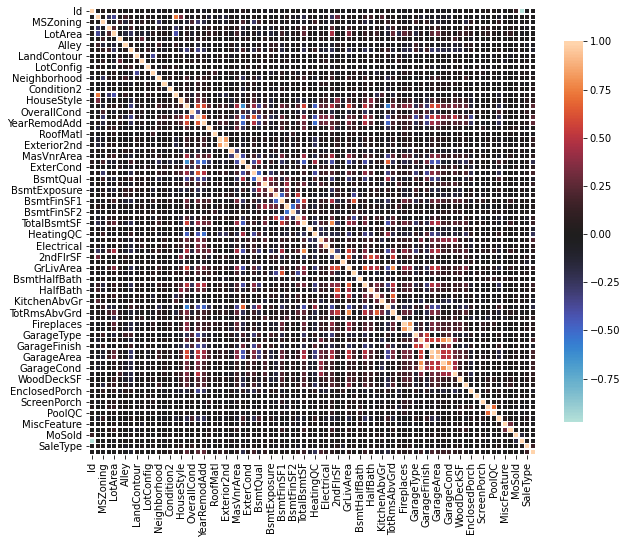

In [25]:
def correlation_heatmap(test_data):
    correlations = test_data.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test_data)

In [26]:
feat_col = ['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','ExterQual','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageCars','GarageArea']

Linear Regression Model

In [27]:
# Linear Model for the  train and test
X = train_data[feat_col]
Y = train_data['SalePrice']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [29]:
mytest =test_data[feat_col]

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test,y_test))

Linear Regression R squared": 0.8379


In [33]:
predicted = regressor.predict(mytest)

In [34]:
print(pd.DataFrame({'Predicted Price':predicted}))

      Predicted Price
0        91999.486628
1       146014.569048
2       152275.661837
3       181545.347071
4       196500.106334
...               ...
1454     57780.813533
1455     79833.635129
1456    150966.348431
1457     93242.203392
1458    216229.480285

[1459 rows x 1 columns]


So, finally the above are the Predicted house prices using Linear regression model